# Wordcloud
Using [Top Games on Google Play Store](https://www.kaggle.com/dhruvildave/top-play-store-games) dataset from Kaggle
<br>


## Import Library

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Import Data

In [ ]:
df = pd.read_csv("data/android-games.csv")
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


## Game Genre WordCloud

### Combining all game category / genre

> Indented block



In [ ]:
text = " ".join(cat.split()[1] for cat in df.category)
text

'ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE

### Setting up word cloud and plot it

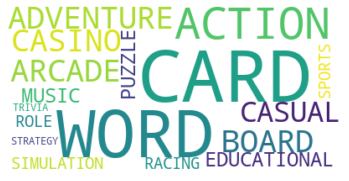

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
word_cloud.to_file("genre_wordcloud.png")
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### creating game icon mask

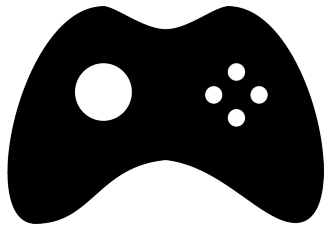

In [ ]:
game_mask = np.array(Image.open("game_mask.png"))
plt.imshow(game_mask)
plt.axis("off")
plt.show()

### Make word cloud inside the icon mask

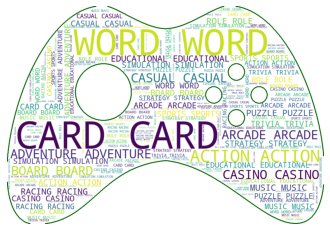

In [ ]:
wordcloud = WordCloud(background_color="white", 
                      mask=game_mask,
                      contour_width=3, 
                      repeat=True,
                      min_font_size=3,
                      contour_color='darkgreen')

# Generate a wordcloud
wordcloud.generate(text)

# store to file
wordcloud.to_file("genre_wordcloud_masked.png")

# show

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Game Title WordCloud

### Combining all game title

In [ ]:
text2 = " ".join(title for title in df.title)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

### Setting up wordcloud and plot it

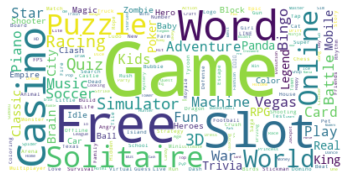

In [ ]:
word_cloud2.to_file("title_wordcloud.png")
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

### creating colored google play icon mask

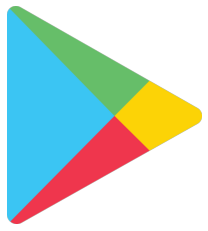

In [ ]:
color_mask = np.array(Image.open("game_color3.png"))
plt.imshow(color_mask)
plt.axis("off")
plt.show()

### Setting up wordcloud to match the colored icon and plot it

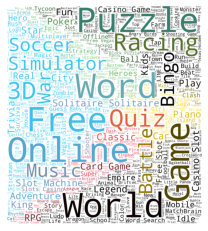

In [ ]:
image_colors = ImageColorGenerator(color_mask)

wc_color = WordCloud(stopwords=STOPWORDS, 
                        background_color="white", 
                        mode="RGBA", 
                        max_words=1000, 
                        #contour_width=3, 
                        repeat=True,
                        mask=color_mask)


wc_color.generate(text2)
wc_color.recolor(color_func = image_colors)

wc_color.to_file("title_wordcloud_masked.png")
plt.imshow(wc_color)
plt.axis("off")
plt.show()